# Problem 1A:

## Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.



### Importing all the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import dataframe_image as dfi

### Loading the Dataset

In [3]:
df = pd.read_csv('SalaryData.csv')

### Checking the top 5 records

In [4]:
df

Education        Occupation  Salary
0    Doctorate      Adm-clerical  153197
1    Doctorate      Adm-clerical  115945
2    Doctorate      Adm-clerical  175935
3    Doctorate      Adm-clerical  220754
4    Doctorate             Sales  170769
5    Doctorate             Sales  219420
6    Doctorate             Sales  237920
7    Doctorate             Sales  160540
8    Doctorate             Sales  180934
9    Doctorate    Prof-specialty  248156
10   Doctorate    Prof-specialty  247724
11   Doctorate    Prof-specialty  249207
12   Doctorate    Prof-specialty  235334
13   Doctorate    Prof-specialty  248871
14   Doctorate    Prof-specialty  257345
15   Bachelors      Adm-clerical  160910
16   Bachelors      Adm-clerical  162494
17   Bachelors      Adm-clerical  188729
18   Bachelors    Prof-specialty   99185
19   Bachelors    Prof-specialty   90135
20   Bachelors    Prof-specialty  100135
21   Bachelors    Prof-specialty  133696
22   Bachelors             Sales  149909
23   Bachelors             Sales  191712
24   Bachelors             Sales  167431
25   Bachelors             Sales  260151
26     HS-grad             Sales   50103
27     HS-grad             Sales   50122
28     HS-grad             Sales   52242
29     HS-grad      Adm-clerical   75333
30     HS-grad      Adm-clerical   77743
31     HS-grad      Adm-clerical   83203
32     HS-grad    Prof-specialty   90456
33     HS-grad    Prof-specialty  100678
34     HS-grad    Prof-specialty   95469
35   Bachelors   Exec-managerial  173935
36   Bachelors   Exec-managerial  212448
37   Bachelors   Exec-managerial  173664
38   Bachelors   Exec-managerial  212760
39   Doctorate   Exec-managerial  212781

### Daat Cleaning

In [5]:
def data_clean(text):
    return str.strip(text)

In [6]:
df.Education = df.Education.apply(data_clean)

In [7]:
df.Occupation = df.Occupation.apply(data_clean)

### Checking the shape and information on the DataFrame

In [8]:
df.shape

(40, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


### Checking the summary of the DataFrame

In [10]:
df.describe().T

count        mean           std      min      25%       50%  \
Salary   40.0  162186.875  64860.407506  50103.0  99897.5  169100.0   

              75%       max  
Salary  214440.75  260151.0

### Checking Distinct Value of the Design

In [11]:
df.Education.value_counts()

Doctorate    16
Bachelors    15
HS-grad       9
Name: Education, dtype: int64

In [12]:
df.Occupation.value_counts()

Prof-specialty     13
Sales              12
Adm-clerical       10
Exec-managerial     5
Name: Occupation, dtype: int64

### 1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

### For Salary and Education

$H_0$ : Salary is dependent on educational qualification.

$H_1$ : Salary is not dependent on educational qualification.

Confidence level ($\alpha$) = 0.05

### For Salary and Occupation

$H_O$ : Salary is dependent on occupation

$H_1$ : Salary is not dependent on educational qualification

Confidence level ($\alpha$) = 0.05

### 2. Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

#### Checking the Normality Condition of ANOVA

The Shapiro- Wilk test tests the Null Hypothesis that the data was drawn from a normal distribution

In [13]:
Education_Doctorate = df[df['Education'] == 'Doctorate']['Salary']
Education_Bachelors = df[df['Education'] == 'Bachelors']['Salary']
Education_HS = df[df['Education'] == 'HS-grad']['Salary']

In [14]:
print(stats.shapiro(Education_Doctorate))
print(stats.shapiro(Education_Bachelors))
print(stats.shapiro(Education_HS))

ShapiroResult(statistic=0.8952829837799072, pvalue=0.0675690770149231)
ShapiroResult(statistic=0.9607304334640503, pvalue=0.7050924301147461)
ShapiroResult(statistic=0.885286271572113, pvalue=0.1783432960510254)


since p- value for all 3 continuous variables which are grouped by their respective educational qualifications is greater than 0.05, we fail to reject the Null Hypothesis. Therefore we can say that they are Normally distributed.

#### Checking variance equality condition of ANOVA
The Levene test tests the Null Hypothesis that all input samples are from populations with equal variances

In [15]:
print(stats.levene(Education_Doctorate, Education_Bachelors, Education_HS))

LeveneResult(statistic=1.8800921605836554, pvalue=0.16686425699301183)


since p- value is greater than 0.05 we failed to reject the null hypothesis. Therefore, we can say that the input samples are from populations with equal variances

In [16]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table_I = anova_lm(model)
print(aov_table_I)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


since p- value is less than the significance level, we can reject the Null Hypothesis and state that Salary is not dependent on educational qualification

In [17]:
dfi.export(aov_table_I,'aov_table_I.png')

### 3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

#### Checking the Normality Condition of ANOVA

The Shapiro- Wilk test tests the Null Hypothesis that the data was drawn from a normal distribution

In [18]:
Occ_Prof_Speciality = df[df['Occupation'] == 'Prof-specialty']['Salary']
Occ_Sales = df[df['Occupation'] == 'Sales']['Salary']
Occ_Adm_clerical = df[df['Occupation'] == 'Adm-clerical']['Salary']
Occ_Exec_managerial = df[df['Occupation'] == 'Exec-managerial']['Salary']

In [19]:
print(stats.shapiro(Occ_Prof_Speciality))
print(stats.shapiro(Occ_Sales))
print(stats.shapiro(Occ_Adm_clerical))
print(stats.shapiro(Occ_Exec_managerial))

ShapiroResult(statistic=0.736305832862854, pvalue=0.001313115586526692)
ShapiroResult(statistic=0.8897128701210022, pvalue=0.11683973670005798)
ShapiroResult(statistic=0.9189430475234985, pvalue=0.34822404384613037)
ShapiroResult(statistic=0.6901877522468567, pvalue=0.007539781276136637)


since p- value for Occupation - 'Prof-specialty' and 'Exec-managerial' is less than 0.05, we can say that they are not Normally Distributed. But for Occupation - 'Sales' and 'Adm-clerical' p- value is more than 0.05. we can say that they are Normally Distributed. Since 50% of the samples are Normally Distributed, we can proceed with ANOVA

#### Checking variance equality condition of ANOVA
The Levene test tests the Null Hypothesis that all input samples are from populations with equal variances

In [20]:
print(stats.levene(Occ_Prof_Speciality, Occ_Sales, Occ_Adm_clerical, Occ_Exec_managerial))

LeveneResult(statistic=2.4378177404396832, pvalue=0.0803790714975064)


since p- value is greater than 0.05 we failed to reject the null hypothesis. Therefore, we can say that the input samples are from populations with equal variances

In [21]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table_II = anova_lm(model)
print(aov_table_II)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


since p- value is greater than the significance level, we failed to reject the Null Hypothesis. We can say that salary is dependent on Occupation

In [22]:
dfi.export(aov_table_II,'aov_table_II.png')

### 4. If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

In [23]:
comp_table_I = aov_table_I[['mean_sq']]
comp_table_I

mean_sq
C(Education)  5.134773e+10
Residual      1.658718e+09

In [24]:
dfi.export(comp_table_I,'comp_tab.png')

In [25]:
comp_table_II = aov_table_II[['mean_sq']]
comp_table_II

mean_sq
C(Occupation)  3.752928e+09
Residual       4.244701e+09

In [26]:
dfi.export(comp_table_II,'comp_table_II.png')

mean_sq difference is more between Educational qualification class this means that Education class means are significantly different.

# Problem 1B:

### 1. What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

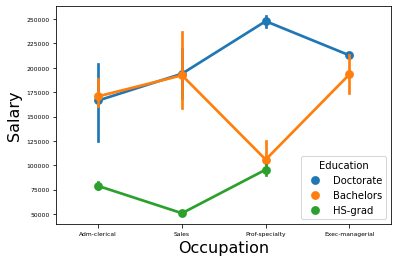

In [27]:
sns.pointplot(x = 'Occupation', y = 'Salary', data = df, hue = 'Education')
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Occupation', fontsize = 16)
plt.ylabel('Salary', fontsize = 16)
plt.savefig('Interaction_between_2_Treatments')
plt.show()

Following are the keypoints observed from the interaction plot:

- Adm-clerical and sales having bachelors and doctorate degree earn similar salary
- Prof-specialty having Doctorate degree earns the maximum  
- Prof-specialty having degree Bachelors and HS-grad have similar salary.

### 2. Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

$H_O$ : The Salary is dependent on Both Education and Occupation

$H_1$ : The Salary is not dependent on Both Education and Occupation

Confidence Level ($\alpha$): 0.05

#### Checking the Normality Condition of ANOVA

The Shapiro- Wilk test tests the Null Hypothesis that the data was drawn from a normal distribution

In [28]:
df1 = df[(df['Education'] == 'Doctorate')& (df['Occupation'] == 'Prof-specialty')]['Salary']
df2 = df[(df['Education'] == 'Doctorate')& (df['Occupation'] == 'Sales')]['Salary']
df3 = df[(df['Education'] == 'Doctorate')& (df['Occupation'] == 'Adm-clerical')]['Salary']
df4 = df[(df['Education'] == 'Doctorate')& (df['Occupation'] == 'Exec-managerial')]['Salary']
df5 = df[(df['Education'] == 'Bachelors')& (df['Occupation'] == 'Prof-specialty')]['Salary']
df6 = df[(df['Education'] == 'Bachelors')& (df['Occupation'] == 'Sales')]['Salary']
df7 = df[(df['Education'] == 'Bachelors')& (df['Occupation'] == 'Adm-clerical')]['Salary']
df8 = df[(df['Education'] == 'Bachelors')& (df['Occupation'] == 'Exec-managerial')]['Salary']
df9 = df[(df['Education'] == 'HS-grad')& (df['Occupation'] == 'Prof-specialty')]['Salary']
df10 = df[(df['Education'] == 'HS-grad')& (df['Occupation'] == 'Sales')]['Salary']
df11 = df[(df['Education'] == 'HS-grad')& (df['Occupation'] == 'Adm-clerical')]['Salary']
df12 = df[(df['Education'] == 'HS-grad')& (df['Occupation'] == 'Exec-managerial')]['Salary']


In [29]:
df4

39    212781
Name: Salary, dtype: int64

In [30]:
print(stats.shapiro(df1))
print(stats.shapiro(df2))
print(stats.shapiro(df3))
#print(stats.shapiro(df4))
print(stats.shapiro(df5))
print(stats.shapiro(df6))
print(stats.shapiro(df7))
print(stats.shapiro(df8))
print(stats.shapiro(df9))
print(stats.shapiro(df10))
print(stats.shapiro(df11))
#print(stats.shapiro(df12))

ShapiroResult(statistic=0.8571751117706299, pvalue=0.1796833723783493)
ShapiroResult(statistic=0.9059374332427979, pvalue=0.4435662627220154)
ShapiroResult(statistic=0.9969509243965149, pvalue=0.9896460175514221)
ShapiroResult(statistic=0.8238510489463806, pvalue=0.15232744812965393)
ShapiroResult(statistic=0.9072796702384949, pvalue=0.4681086838245392)
ShapiroResult(statistic=0.7925583720207214, pvalue=0.09685297310352325)
ShapiroResult(statistic=0.7352886199951172, pvalue=0.027851471677422523)
ShapiroResult(statistic=0.9998774528503418, pvalue=0.9788563251495361)
ShapiroResult(statistic=0.7566614151000977, pvalue=0.014755938202142715)
ShapiroResult(statistic=0.9523223638534546, pvalue=0.579590380191803)


For more than 50% of the data collected, p- value is greater than 0.05. Therefore, for more than 50% of the data collected we failed to reject the Null Hypothesis.
As a result more than 50% of the sample data is normally distributed and  we can proceed with ANOVA test

#### Checking variance equality condition of ANOVA
The Levene test tests the Null Hypothesis that all input samples are from populations with equal variances

In [31]:
stats.levene(df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11)

LeveneResult(statistic=1.9901869818184943, pvalue=0.07242074266567151)

since p- value is greater than 0.05, we failed to reject the Null Hypothesis. Therefore we can conclude that all input samples are from populations with equal variance

In [32]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, df).fit()
aov_table_III = anova_lm(model)
print(aov_table_III)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


since p- value is less than 0.05, we failed to reject the Null Hypothesis. We can state that Salary is dependent on both Education and Occupation

In [33]:
dfi.export(aov_table_III,'aov_table_III.png')

### 3. Explain the business implications of performing ANOVA for this particular case study.

By performing ANOVA, we can conclude that salary is dependent on occupation but it is not dependent on education qualification.
When we consider both the class i.e. education and occupation we can say that salary is moderately dependent on both of these classes.
Adm-Clerical and Sales professionals with Bachelors and Doctorate degrees earn almost similar salary packages, where HS-grad has low salary packages in every Occupation as compare to Bachelors and Doctorate.

# Problem 2A

## The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [34]:
df = pd.read_csv('Education+-+Post+12th+Standard.csv')

#### Checking the top 5 rows of the data

In [35]:
top_5 = df.head()
top_5

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [36]:
dfi.export(top_5,'top_5.png')

#### Checking the bottom 5 rows of the data

In [37]:
bottom_5 = df.tail()
bottom_5

Names   Apps  Accept  Enroll  Top10perc  \
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99

In [38]:
dfi.export(bottom_5,'bottom_5.png')

In [39]:
df.shape

(777, 18)

#### The dataset has 777 rows and 18 columns

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

#### Checking if there are any null values in the dataset

In [41]:
df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

#### Checking summary of data 

In [42]:
data_sum = df.describe(include = 'all').T
data_sum

count unique                 top freq          mean          std  \
Names          777    777  Cedarville College    1           NaN          NaN   
Apps         777.0    NaN                 NaN  NaN   3001.638353  3870.201484   
Accept       777.0    NaN                 NaN  NaN   2018.804376  2451.113971   
Enroll       777.0    NaN                 NaN  NaN    779.972973    929.17619   
Top10perc    777.0    NaN                 NaN  NaN     27.558559    17.640364   
Top25perc    777.0    NaN                 NaN  NaN     55.796654    19.804778   
F.Undergrad  777.0    NaN                 NaN  NaN   3699.907336  4850.420531   
P.Undergrad  777.0    NaN                 NaN  NaN    855.298584  1522.431887   
Outstate     777.0    NaN                 NaN  NaN  10440.669241  4023.016484   
Room.Board   777.0    NaN                 NaN  NaN   4357.526384  1096.696416   
Books        777.0    NaN                 NaN  NaN    549.380952    165.10536   
Personal     777.0    NaN                 NaN  NaN   1340.642214   677.071454   
PhD          777.0    NaN                 NaN  NaN     72.660232    16.328155   
Terminal     777.0    NaN                 NaN  NaN     79.702703    14.722359   
S.F.Ratio    777.0    NaN                 NaN  NaN     14.089704     3.958349   
perc.alumni  777.0    NaN                 NaN  NaN     22.743887    12.391801   
Expend       777.0    NaN                 NaN  NaN   9660.171171   5221.76844   
Grad.Rate    777.0    NaN                 NaN  NaN      65.46332     17.17771   

                min     25%     50%      75%      max  
Names           NaN     NaN     NaN      NaN      NaN  
Apps           81.0   776.0  1558.0   3624.0  48094.0  
Accept         72.0   604.0  1110.0   2424.0  26330.0  
Enroll         35.0   242.0   434.0    902.0   6392.0  
Top10perc       1.0    15.0    23.0     35.0     96.0  
Top25perc       9.0    41.0    54.0     69.0    100.0  
F.Undergrad   139.0   992.0  1707.0   4005.0  31643.0  
P.Undergrad     1.0    95.0   353.0    967.0  21836.0  
Outstate     2340.0  7320.0  9990.0  12925.0  21700.0  
Room.Board   1780.0  3597.0  4200.0   5050.0   8124.0  
Books          96.0   470.0   500.0    600.0   2340.0  
Personal      250.0   850.0  1200.0   1700.0   6800.0  
PhD             8.0    62.0    75.0     85.0    103.0  
Terminal       24.0    71.0    82.0     92.0    100.0  
S.F.Ratio       2.5    11.5    13.6     16.5     39.8  
perc.alumni     0.0    13.0    21.0     31.0     64.0  
Expend       3186.0  6751.0  8377.0  10830.0  56233.0  
Grad.Rate      10.0    53.0    65.0     78.0    118.0

In [43]:
dfi.export(data_sum,'data_sum.png')

#### Checking for any duplicates in the data 

In [44]:
dup = df.duplicated()
print('There are',str(dup.sum()),'duplicated rows in the dataset')

There are 0 duplicated rows in the dataset


After performing the initial diagnosis on the dataset we find that the data has 777 rows and 18 columns in total. The given data has 16 integer, 1 float and 1 object type data. There are no duplicated row in the dataset. There are no null values in the dataset as well.

### Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

#### Univariate Analysis

In [45]:
sns.set_style('whitegrid')

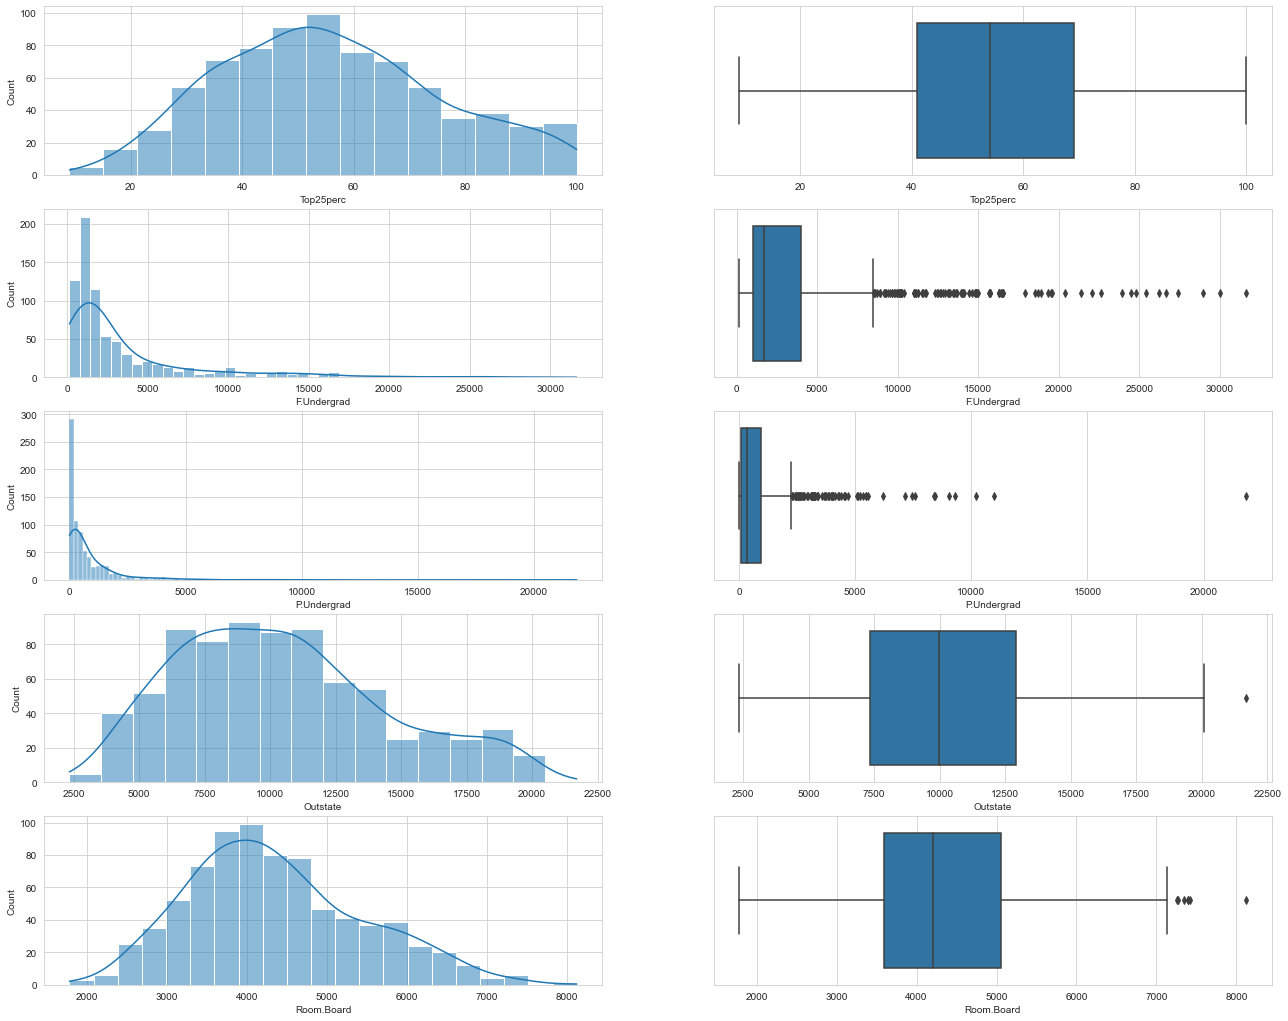

In [46]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)
fig.set_size_inches(22,18)
sns.histplot(data = df, x = 'Top25perc', kde = True, ax = axes[0][0])
sns.boxplot(data = df, x = 'Top25perc', ax = axes[0][1])

sns.histplot(data = df, x = 'F.Undergrad', kde = True, ax = axes[1][0])
sns.boxplot(data = df, x = 'F.Undergrad', ax = axes[1][1])

sns.histplot(data = df, x = 'P.Undergrad', kde = True, ax = axes[2][0])
sns.boxplot(data = df, x = 'P.Undergrad',ax = axes[2][1])

sns.histplot(data = df, x = 'Outstate', kde = True, ax = axes[3][0])
sns.boxplot(data = df, x = 'Outstate',ax = axes[3][1])

sns.histplot(data = df, x = 'Room.Board', kde = True, ax = axes[4][0])
sns.boxplot(data = df, x = 'Room.Board',ax = axes[4][1])
plt.savefig('Uni_1')
plt.show()


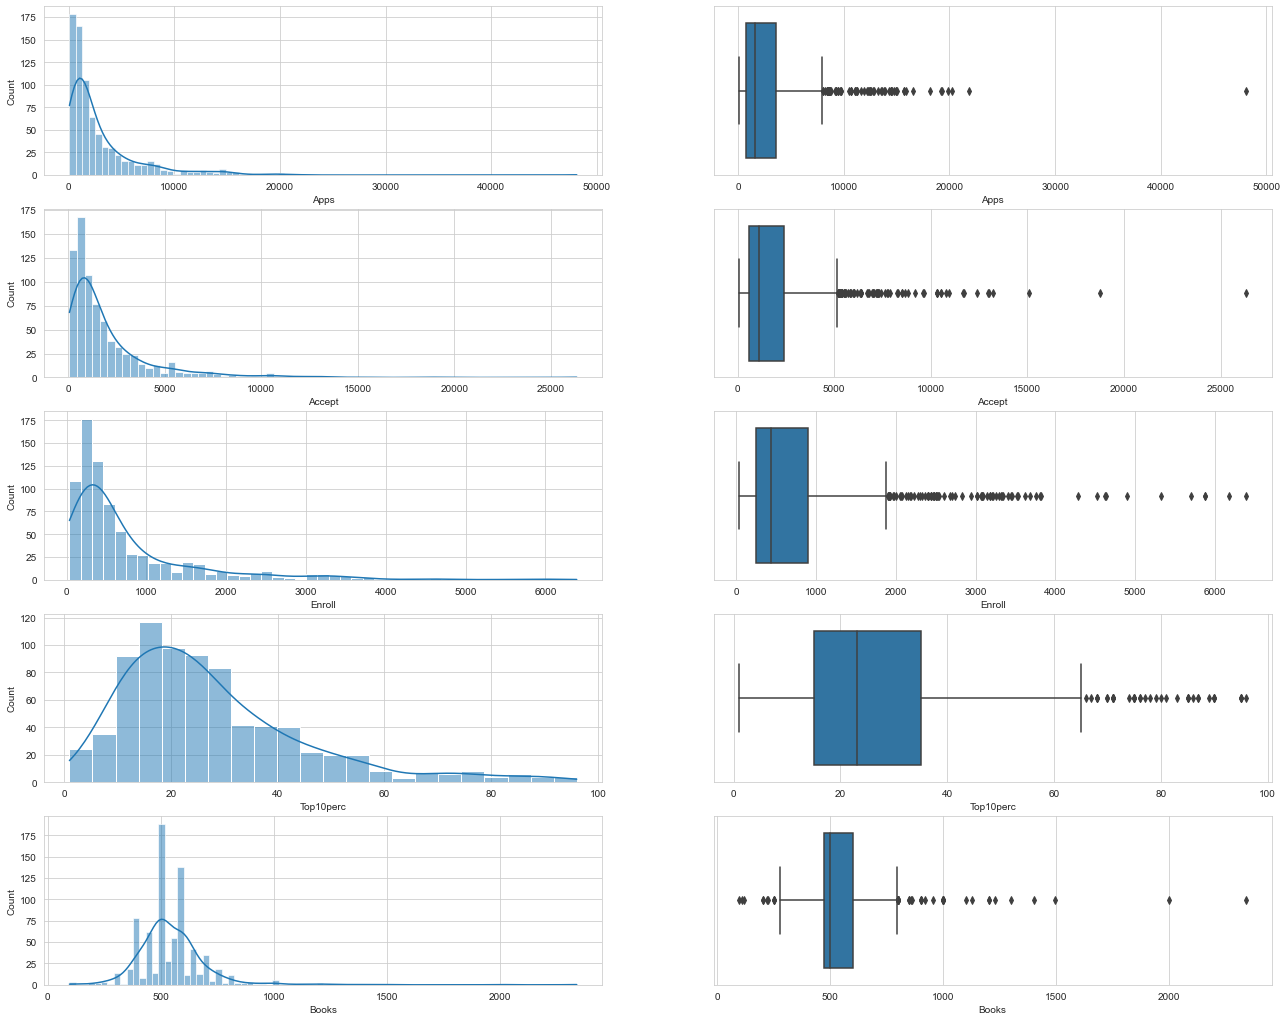

In [47]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)
fig.set_size_inches(22,18)
sns.histplot(data = df, x = 'Apps', kde = True, ax = axes[0][0])
sns.boxplot(data = df, x = 'Apps', ax = axes[0][1])

sns.histplot(data = df, x = 'Accept', kde = True, ax = axes[1][0])
sns.boxplot(data = df, x = 'Accept', ax = axes[1][1])

sns.histplot(data = df, x = 'Enroll', kde = True, ax = axes[2][0])
sns.boxplot(data = df, x = 'Enroll',ax = axes[2][1])

sns.histplot(data = df, x = 'Top10perc', kde = True, ax = axes[3][0])
sns.boxplot(data = df, x = 'Top10perc',ax = axes[3][1])

sns.histplot(data = df, x = 'Books', kde = True, ax = axes[4][0])
sns.boxplot(data = df, x = 'Books',ax = axes[4][1])
plt.savefig('Uni_2')

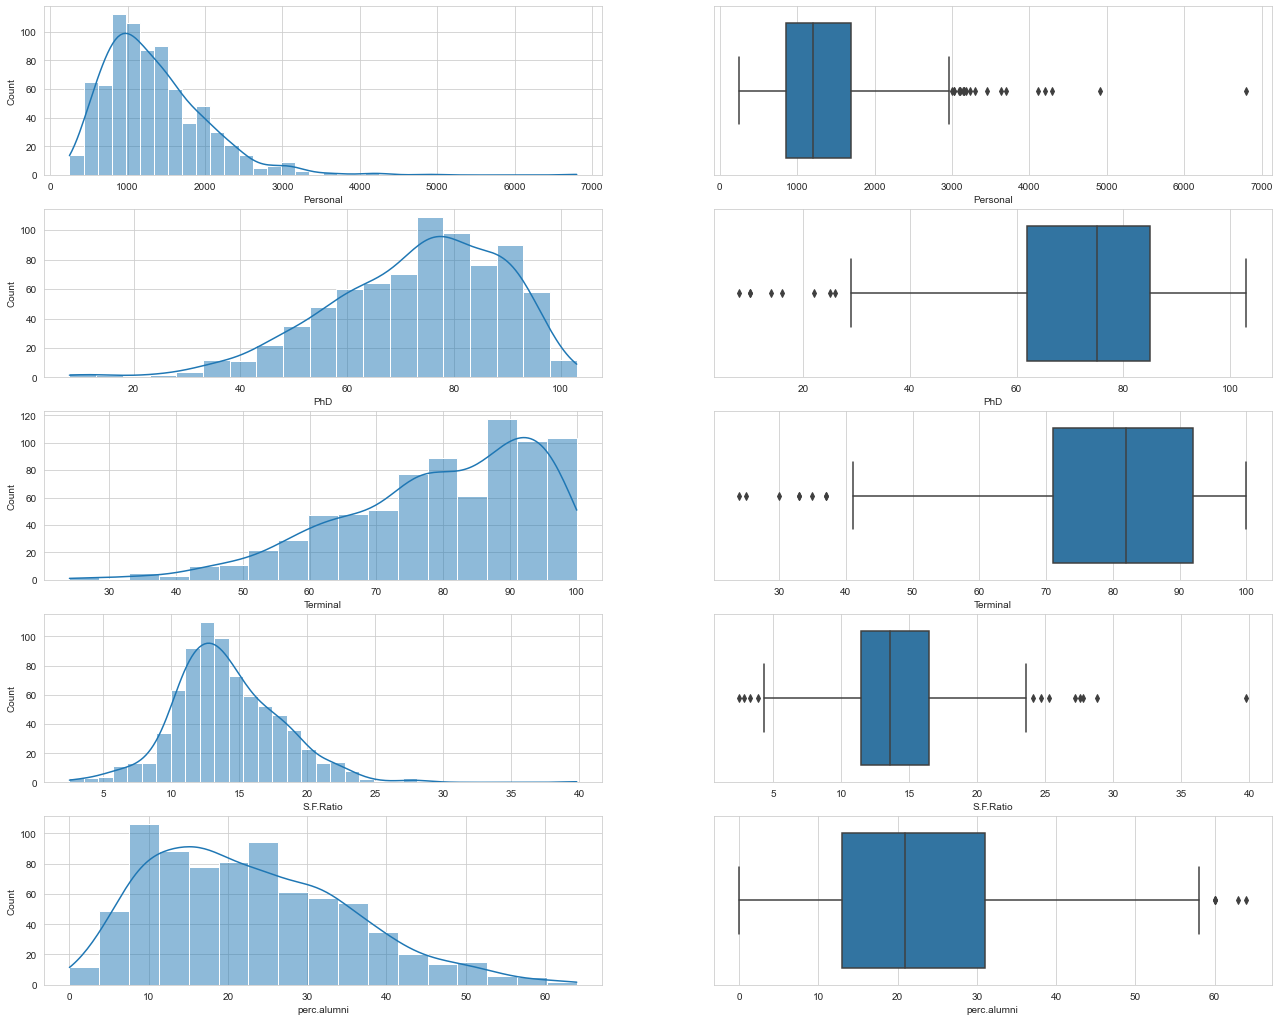

In [48]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)
fig.set_size_inches(22,18)
sns.histplot(data = df, x = 'Personal', kde = True, ax = axes[0][0])
sns.boxplot(data = df, x = 'Personal', ax = axes[0][1])

sns.histplot(data = df, x = 'PhD', kde = True, ax = axes[1][0])
sns.boxplot(data = df, x = 'PhD', ax = axes[1][1])

sns.histplot(data = df, x = 'Terminal', kde = True, ax = axes[2][0])
sns.boxplot(data = df, x = 'Terminal',ax = axes[2][1])

sns.histplot(data = df, x = 'S.F.Ratio', kde = True, ax = axes[3][0])
sns.boxplot(data = df, x = 'S.F.Ratio',ax = axes[3][1])

sns.histplot(data = df, x = 'perc.alumni', kde = True, ax = axes[4][0])
sns.boxplot(data = df, x = 'perc.alumni',ax = axes[4][1])
plt.savefig('Uni_3')

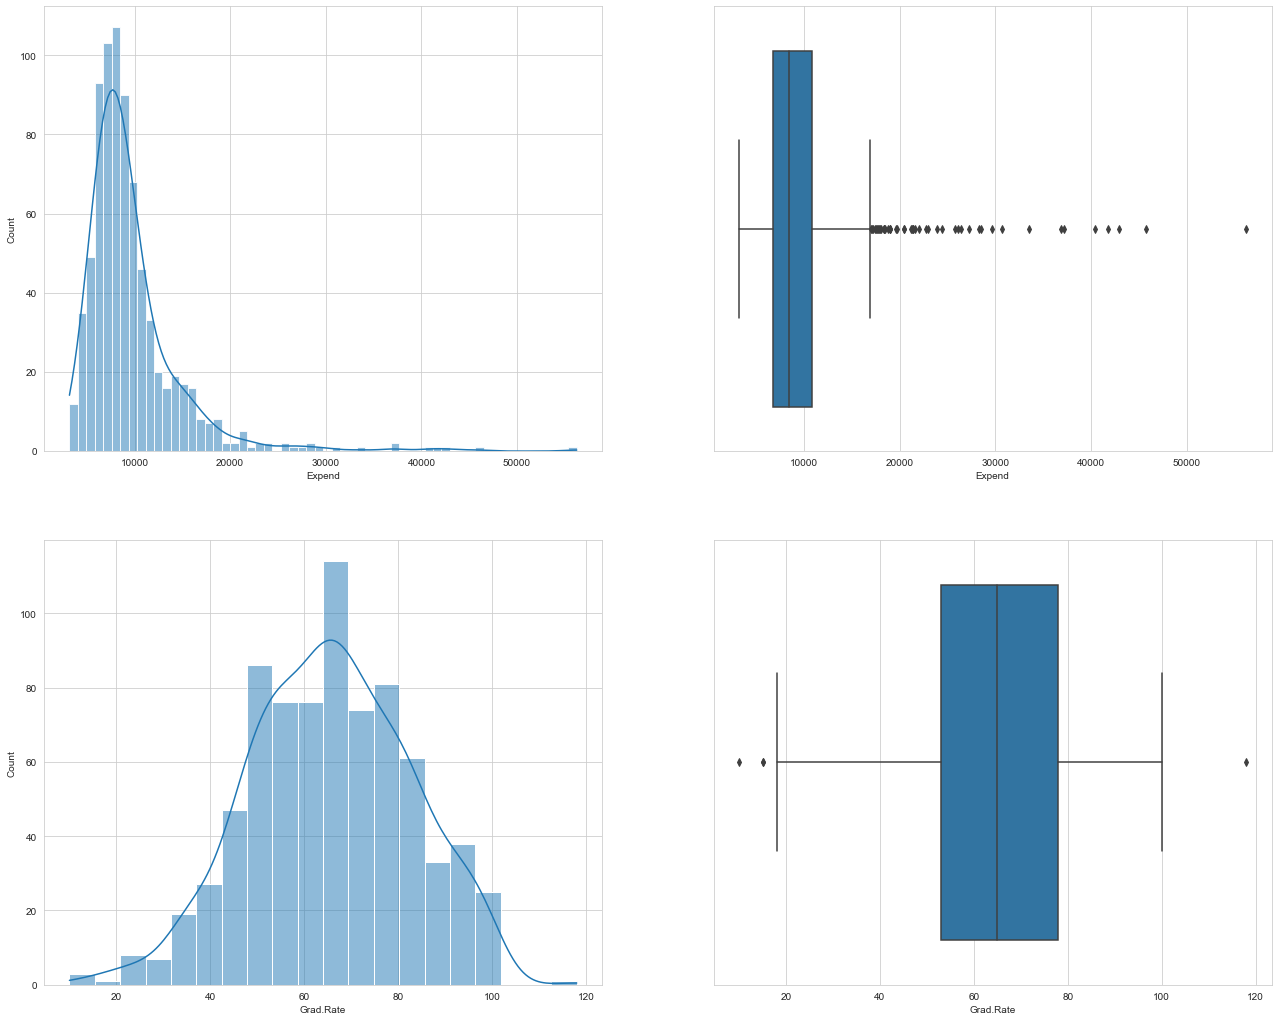

In [49]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(22,18)
sns.histplot(data = df, x = 'Expend', kde = True, ax = axes[0][0])
sns.boxplot(data = df, x = 'Expend', ax = axes[0][1])

sns.histplot(data = df, x = 'Grad.Rate', kde = True, ax = axes[1][0])
sns.boxplot(data = df, x = 'Grad.Rate', ax = axes[1][1])

plt.savefig('Uni_4')

#### Multivariate Analysis

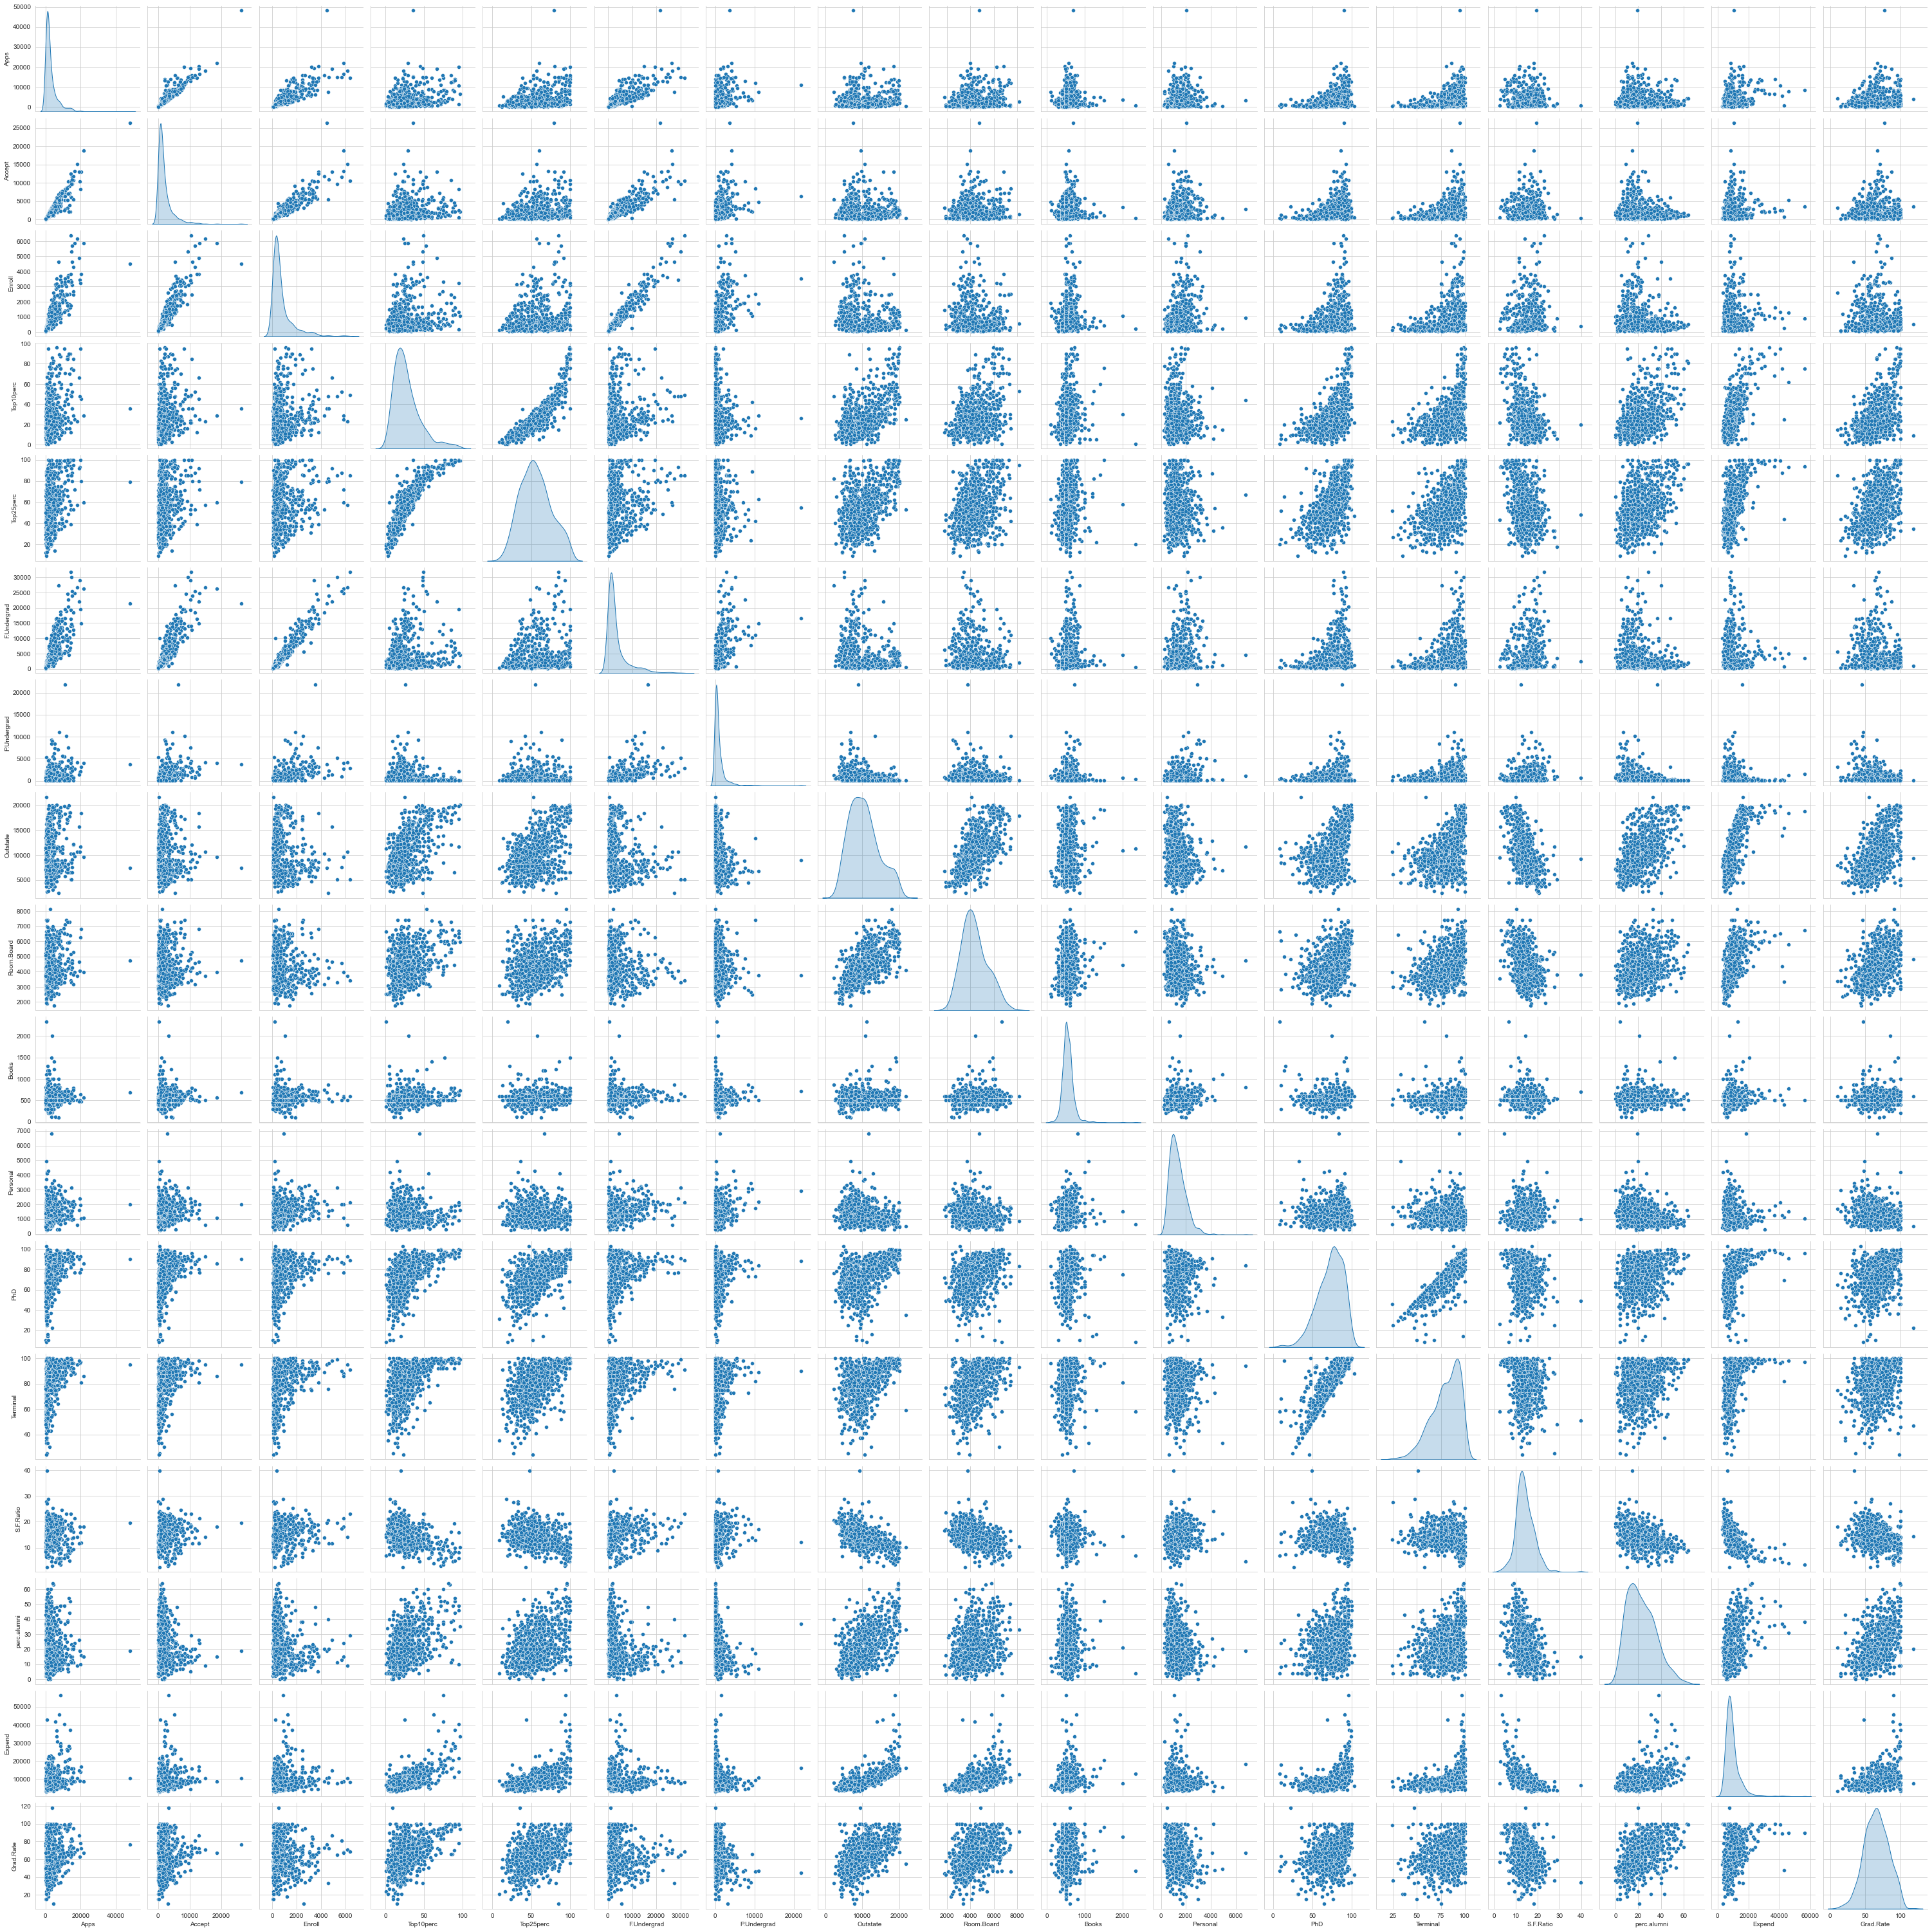

In [50]:
sns.pairplot(data = df, diag_kind= 'kde')
plt.savefig('multi_1')
plt.show()

In [51]:
df_corr = df.corr()
df_corr

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

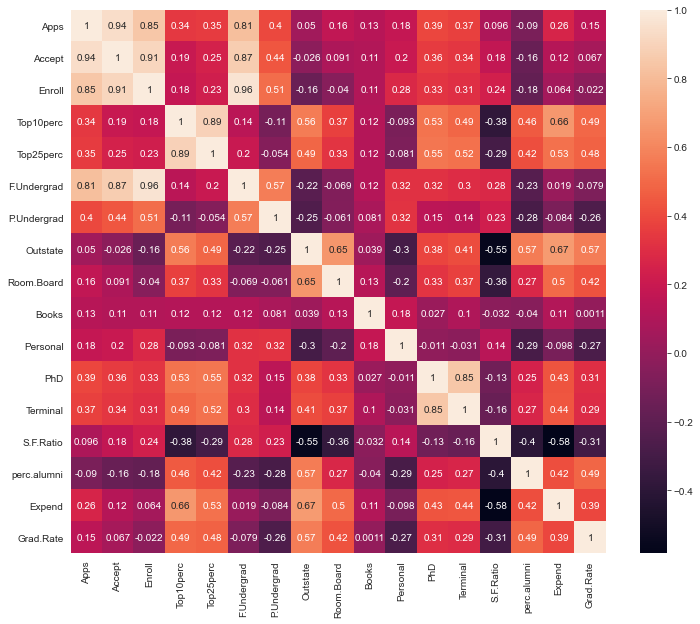

In [52]:
plt.figure(figsize=(12,10))
sns.heatmap(df_corr, annot = True)
plt.savefig('multi2')
plt.show()

### Is scaling necessary for PCA in this case? Give justification and perform scaling.

It is important to perform scaling in PCA. We need scaling because data set might have data with different weights and to compare them to give correct results they should be on the same scale.  In order to bring them in the same scale we perform scaling. Feature scaling (also known as data normalization) is the method used to standardize the range of features of data.

Since we have 1 variable in our data set which is of the type object, we will remove it from our dataset before performing scaling

In [53]:
df_1 = df.drop(columns = ['Names'], axis = 1)

In [54]:
from scipy.stats import zscore

In [55]:
df_z = df_1.apply(zscore)

In [56]:
df_z

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0   -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1   -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2   -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3   -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4   -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   
..        ...       ...       ...        ...        ...          ...   
772 -0.208040 -0.205673 -0.255200  -1.336352  -1.505488    -0.126030   
773 -0.269575 -0.087284 -0.091509  -0.201858  -0.444454    -0.175543   
774 -0.233895 -0.042377 -0.091509   0.365389   0.262901    -0.187095   
775  1.991711  0.177256  0.578333   3.825595   2.182866     0.312977   
776 -0.003268 -0.066872 -0.095816   0.025041   0.363952    -0.146867   

     P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
0      -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028   
1       0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646   
2      -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845   
3      -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206   
4       0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672   
..           ...       ...         ...       ...       ...       ...   
772     0.771435 -0.906289   -0.417455 -0.299280 -0.207855 -0.775861   
773     0.165435  0.268462    0.549707  0.306784 -0.133960  0.020822   
774    -0.453053 -0.880670   -0.143730  0.409815 -0.827095 -0.346878   
775    -0.507606  2.337894    1.963953  0.488603  1.144424  1.430339   
776     0.572283 -1.355744   -0.727676 -0.299280 -0.133960  0.143389   

     Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   -0.115729   1.013776    -0.867574 -0.501910  -0.318252  
1   -3.378176  -0.477704    -0.544572  0.166110  -0.551262  
2   -0.931341  -0.300749     0.585935 -0.177290  -0.667767  
3    1.175657  -1.615274     1.151188  1.792851  -0.376504  
4   -0.523535  -0.553542    -1.675079  0.241803  -2.939613  
..        ...        ...          ...       ...        ...  
772 -1.339146   1.746877    -0.706073 -0.994781  -1.483301  
773 -0.319632  -0.199632     0.666685 -0.090290   1.021555  
774 -0.319632   0.078441    -0.221570 -0.256241  -0.959029  
775  1.107689  -2.095582     2.120194  5.887971   1.953595  
776 -0.319632   1.013776     0.424434 -0.987116   1.953595  

[777 rows x 17 columns]

In [57]:
df_z_top5 = df_z.head()
dfi.export(df_z_top5,'df_z_top5.png')

### Comment on the comparison between covariance and the correlation matrix after scaling.

Covariance is a quantitative measure of the degree to which the deviation of one variable from its mean is related to the deviation of another variable from its mean. Whereas, Correlation tells us both the strength and the direction of this relationship. Correlation is best used for multiple variables that express a linear relationship with one another. When we assume a correlation between two variables, we are essentially deducing that a change in one variable impacts a change in another variable. Correlation is a scaled version of covariance.

In [58]:
cov_mat = np.cov(df_z.T)
cov_mat

array([[ 1.00128866,  0.94466636,  0.84791332,  0.33927032,  0.35209304,
         0.81554018,  0.3987775 ,  0.05022367,  0.16515151,  0.13272942,
         0.17896117,  0.39120081,  0.36996762,  0.09575627, -0.09034216,
         0.2599265 ,  0.14694372],
       [ 0.94466636,  1.00128866,  0.91281145,  0.19269493,  0.24779465,
         0.87534985,  0.44183938, -0.02578774,  0.09101577,  0.11367165,
         0.20124767,  0.35621633,  0.3380184 ,  0.17645611, -0.16019604,
         0.12487773,  0.06739929],
       [ 0.84791332,  0.91281145,  1.00128866,  0.18152715,  0.2270373 ,
         0.96588274,  0.51372977, -0.1556777 , -0.04028353,  0.11285614,
         0.28129148,  0.33189629,  0.30867133,  0.23757707, -0.18102711,
         0.06425192, -0.02236983],
       [ 0.33927032,  0.19269493,  0.18152715,  1.00128866,  0.89314445,
         0.1414708 , -0.10549205,  0.5630552 ,  0.37195909,  0.1190116 ,
        -0.09343665,  0.53251337,  0.49176793, -0.38537048,  0.45607223,
         0.6617651 

In [59]:
corr_z = df_z.corr()
corr_z

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [60]:
dfi.export(corr_z,'corr_z.png')

In [61]:
dfi.export(pd.DataFrame(cov_mat),'cov_mat.png')

### Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

#### After plotting boxplot for data set after and before scaling we observe that the standard deviation remains same for all the variables and that the outliers are still present. Therefore we can say that the variables after scaling have been reduced to same weight. 

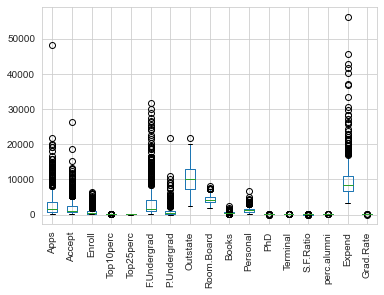

In [62]:
df.boxplot(rot = 90)
plt.savefig('df_box')
plt.show()

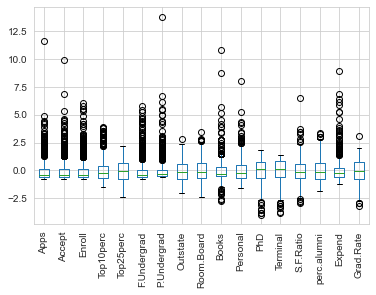

In [63]:
df_z.boxplot(rot = 90)
plt.savefig('df_z_box')
plt.show()

### Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components=17, random_state = 123)
pca_transformed = pca.fit_transform(df_z)

In [66]:
eigen_values= pca.explained_variance_
eigen_values

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [67]:
eigen_vectors = pca.components_
eigen_vectors

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [68]:
dfi.export(pd.DataFrame(eigen_values),'eigen_values.png')

In [69]:
dfi.export(pd.DataFrame(eigen_vectors),'eigen_vectors.png')

### Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [70]:
pca = PCA(n_components=7, random_state = 123)
pca_transformed = pca.fit_transform(df_z)

In [71]:
pca_transformed.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [-7.43975398e-01,  1.05999660e+00, -3.69613274e-01, ...,
        -5.16021118e-01, -9.47754745e-01, -1.13217594e+00],
       [-2.98306081e-01, -1.77137309e-01, -9.60591689e-01, ...,
         4.68014248e-01, -2.06993738e+00,  8.39893087e-01],
       [ 6.38443468e-01,  2.36753302e-01, -2.48276091e-01, ...,
        -1.31749158e+00,  8.33276555e-02,  1.30731260e+00]])

In [72]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871])

In [73]:
df_extracted = pd.DataFrame(pca.components_.T, columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7'], index = df_z.columns)

In [74]:
df_extracted

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7  
Apps        -0.042486  
Accept      -0.012950  
Enroll      -0.027693  
Top10perc   -0.161332  
Top25perc   -0.118486  
F.Undergrad -0.025076  
P.Undergrad  0.061042  
Outstate     0.108529  
Room.Board   0.209744  
Books       -0.149692  
Personal     0.633790  
PhD         -0.001096  
Terminal    -0.028477  
S.F.Ratio    0.219259  
perc.alumni  0.243321  
Expend      -0.226584  
Grad.Rate    0.559944

In [75]:
dfi.export(df_extracted,'df_extracted.png')

#### A scree plot is used to check the cumulative explained variance ratio to find a cut off for selecting the number of PC’s

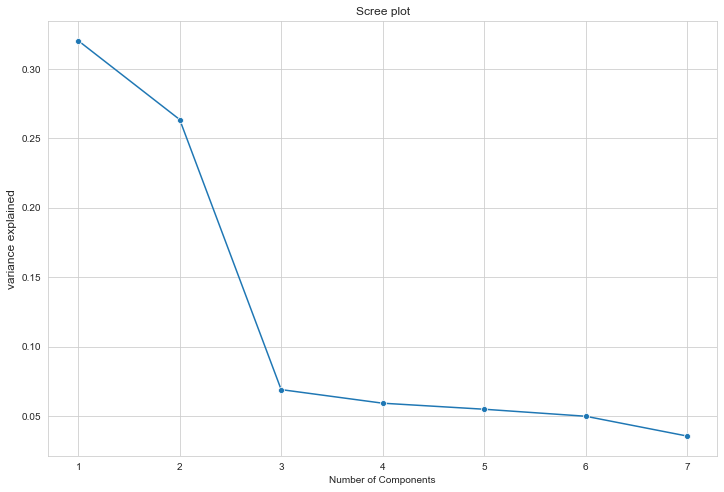

In [76]:
plt.figure(figsize=(12,8))
sns.lineplot(y = pca.explained_variance_ratio_, x = range(1,8), marker = 'o')
plt.xlabel('Number of Components', fontsize= 10)
plt.ylabel('variance explained', fontsize =12)
plt.title('Scree plot')
plt.savefig('scree_plt')
plt.show()

### Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [77]:
eigen_vectors[0].round(2)

array([ 0.25,  0.21,  0.18,  0.35,  0.34,  0.15,  0.03,  0.29,  0.25,
        0.06, -0.04,  0.32,  0.32, -0.18,  0.21,  0.32,  0.25])

**PC1 = .25 * Apps + 0.22 * Accept + 0.18 * Enroll + 0.35 * Top10perc +0.34 * Top25perc + 0.15 * FUndergrad +.03 * PUndergrad +.29 * Outstate + 0.25 * RoomBoard +0.06 * Books -.04 * Personal + 0.32 * PhD +0.32 * Terminal -0.18 * SFRatio + 0.21 * PercAlumni + 0.32 * Expend +0.25 * GradRate**

### Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [78]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726])

The Cumulative % gives the percentage of variance accounted for by the n components. We can see that around 7 principal components explained over 85% of the variance. Thus, the optimum number of principal components can be 7. Eigenvectors indicate the direction of the principal components, we can multiply the original data by the eigenvectors to re-orient our data onto the new axes.

In [79]:
df_selected = df_extracted[['PC1','PC2','PC3','PC4','PC5','PC6','PC7']]

In [80]:
df_selected

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7  
Apps        -0.042486  
Accept      -0.012950  
Enroll      -0.027693  
Top10perc   -0.161332  
Top25perc   -0.118486  
F.Undergrad -0.025076  
P.Undergrad  0.061042  
Outstate     0.108529  
Room.Board   0.209744  
Books       -0.149692  
Personal     0.633790  
PhD         -0.001096  
Terminal    -0.028477  
S.F.Ratio    0.219259  
perc.alumni  0.243321  
Expend      -0.226584  
Grad.Rate    0.559944

In [81]:
dfi.export(df_selected,'df_selected.png')

### Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [82]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_z))
df_pca_loading.shape

(7, 17)

In [83]:
df_pca_loading

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   
5 -0.016237  0.007535 -0.042558  -0.052693   0.033092    -0.043454   
6 -0.042486 -0.012950 -0.027693  -0.161332  -0.118486    -0.025076   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   
5    -0.191199 -0.030000    0.162755  0.641055 -0.331398  0.091256  0.154928   
6     0.061042  0.108529    0.209744 -0.149692  0.633790 -0.001096 -0.028477   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268  
5   0.487046    -0.047340 -0.298119   0.216163  
6   0.219259     0.243321 -0.226584   0.559944

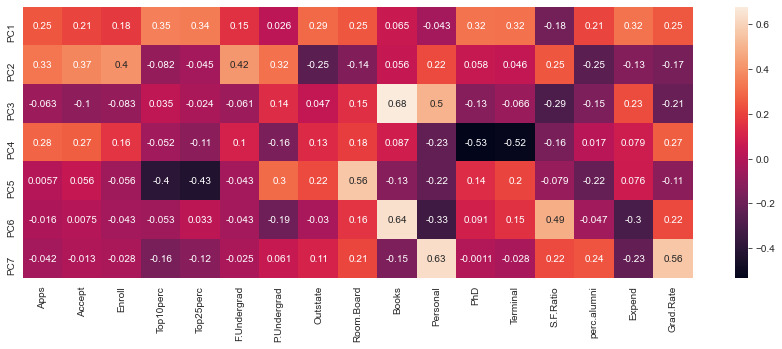

In [84]:
plt.figure(figsize=(15,5))
sns.heatmap(df_pca_loading,annot=True,yticklabels=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
plt.savefig('heat_map')
plt.show()

#### 1. Principal component analysis is a technique for dimension reduction — so it combines  input variables in a specific way, to drop the “least important” variables while still retaining the most valuable parts of all of the variables. As an added benefit, each of the “new” variables after PCA are all independent of one another.
#### 2. In this case study, we had 17 numeric variables to be assessed, with PCA we did dimensionality reduction from 17 to 8 (representing more than 90% of the variance). Thus, as far as business implication of using PCA is concerned, in this case, we are reducing a highdimensional space (with 17 variables) and converting it to a lower dimensional space without (theoretically) losing much information.
#### 3. This heatmap and the color bar basically represent the correlation between the various feature and the principal component. The Principal Component 3 (PC3) shows high correlation with student's expense on Books and Personal category.
#### 4. PC5 is more related to Room.Board and Outstate.
#### 5. PC6  Highlights estimated personal spending for a student and the instructional expenditure per student